In [1]:
import pandas as pd
import numpy as np

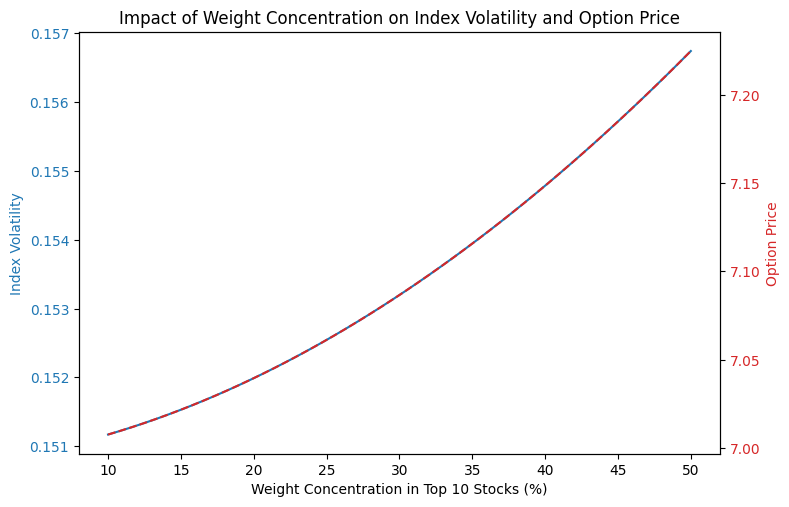

In [6]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# Black-Scholes formula
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * sp.norm.cdf(d1) - K * np.exp(-r * T) * sp.norm.cdf(d2)

# Generate a synthetic market with 500 stocks
np.random.seed(42)
n_stocks = 500

# Assume constant volatilities and correlations
vols = np.random.uniform(0.15, 0.4, size=n_stocks)  # Volatility between 15%-40%
corr_matrix = np.full((n_stocks, n_stocks), 0.3)    # Constant correlation of 0.3
np.fill_diagonal(corr_matrix, 1)                    # Diagonal is 1

 
# Convert to covariance matrix
cov_matrix = np.outer(vols, vols) * corr_matrix

# Assume index price, strike, risk-free rate, and time to expiry
S, K, r, T = 100, 100, 0.02, 1  # S = $100, K = $100, 1-year expiry

# Stress test: Increase concentration in the top 10 stocks from 0% to 90%
tilt_stocks = 10
tilt_factors = np.linspace(0.1, 0.5, 50)  # Range from 0% to 90% weight in top 10

# Increase correlation among the top 10 stocks to 0.8
for i in range(tilt_stocks):
    for j in range(tilt_stocks):
        if i != j:
            corr_matrix[i, j] = 0.8 
           
index_vols = []
option_prices = []

for tilt_factor in tilt_factors:
    new_weights = np.ones(n_stocks) * (1 - tilt_factor) / (n_stocks - tilt_stocks)
    new_weights[:tilt_stocks] = tilt_factor / tilt_stocks  # Concentrate in first 10 stocks

    # Compute new index volatility
    new_index_vol = np.sqrt(new_weights.T @ cov_matrix @ new_weights)
    index_vols.append(new_index_vol)

    # Compute new option price
    new_option_price = black_scholes(S, K, T, r, new_index_vol)
    option_prices.append(new_option_price)

# Plot results
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Weight Concentration in Top 10 Stocks (%)')
ax1.set_ylabel('Index Volatility', color=color)
ax1.plot(tilt_factors * 100, index_vols, color=color, label='Index Volatility')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Option Price', color=color)
ax2.plot(tilt_factors * 100, option_prices, color=color, linestyle='dashed', label='Option Price')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Impact of Weight Concentration on Index Volatility and Option Price')
plt.show()